In [200]:
from datascience import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from notebook.services.config import ConfigManager

cm = ConfigManager()
cm.update(
    "livereveal", {
        'width': 1500,
        'height': 700,
        "scroll": True,
})

{'width': 1500, 'height': 700, 'scroll': True}

# DSC 10 Discussion Week 4
---
Kyle Vigil

# Practice With Join

In [201]:
people = Table().with_columns("name",["kyle","jill","cole","alex"],"age",[24,22,21,24], "city", ["San Diego","LA","San Francisco","Irvine"])
people

name,age,city
kyle,24,San Diego
jill,22,LA
cole,21,San Francisco
alex,24,Irvine


In [202]:
cities = Table().with_columns("name", ["San Diego", "LA", "San Francisco","Denver","New York"], "Popular Food", ["California Burrito", "Tacos", "Sourdough", "Denver Omelete", "Cheesecake"])
cities 

name,Popular Food
San Diego,California Burrito
LA,Tacos
San Francisco,Sourdough
Denver,Denver Omelete
New York,Cheesecake


In [203]:
important_birthdays = Table().with_columns("age", [21,21,22,24], "importance", ["Legal Drinking Age", "Officially an Adult", "Taylor Swift Song", "Kyle's Age"])
important_birthdays

age,importance
21,Legal Drinking Age
21,Officially an Adult
22,Taylor Swift Song
24,Kyle's Age


## How to join people with cities? How many rows will there be?

In [205]:
people.join("city", cities, "name")

city,name,age,Popular Food
LA,jill,22,Tacos
San Diego,kyle,24,California Burrito
San Francisco,cole,21,Sourdough


## How to join people with important_birthdays? How many rows will there be?

In [208]:
important_birthdays.join("age", people)

age,importance,name,city
21,Legal Drinking Age,cole,San Francisco
21,Officially an Adult,cole,San Francisco
22,Taylor Swift Song,jill,LA
24,Kyle's Age,kyle,San Diego
24,Kyle's Age,alex,Irvine


# How to join all three? How many rows? Does order matter?

In [209]:
people.join("age", important_birthdays).join("city", cities, "name")

city,age,name,importance,Popular Food
LA,22,jill,Taylor Swift Song,Tacos
San Diego,24,kyle,Kyle's Age,California Burrito
San Francisco,21,cole,Legal Drinking Age,Sourdough
San Francisco,21,cole,Officially an Adult,Sourdough


# Olympic Athletes
---

From kaggle user Randi H Griffin:
>This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. I scraped this data from www.sports-reference.com in May 2018. The R code I used to scrape and wrangle the data is on GitHub. I recommend checking my kernel before starting your own analysis.
>
>Note that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. A common mistake people make when analyzing this data is to assume that the Summer and Winter Games have always been staggered.
Content
>
>The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:
>
>1. ID - Unique number for each athlete  
>2. Name - Athlete's name  
>3. Sex - M or F  
>4. Age - Integer  
>5. Height - In centimeters  
>6. Weight - In kilograms  
>7. Team - Team name  
>8. NOC - National Olympic Committee 3-letter code  
>9. Games - Year and season  
>10. Year - Integer  
>11. Season - Summer or Winter  
>12. City - Host city  
>13. Sport - Sport  
>14. Event - Event  
>15. Medal - Gold, Silver, Bronze, or NA  


In [210]:
data = Table.read_table("data/athlete_events.csv")
data

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,nan
2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,nan
3,Gunnar Nielsen Aaby,M,24,nan,nan,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,nan
4,Edgar Lindenau Aabye,M,34,nan,nan,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,nan
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",nan
5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,nan
5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",nan
5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,nan
5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",nan


# Let's assign points to each country
---

Let's say we're assigning points to each country based on the number of Golds, Silvers, and Bronzes they've won.

Medals are with the following amount of points:

<pre>
  Gold    +5 pts
  Silver  +3 pts
  Bronze  +2 pts
  nan     0 pts
</pre>

In [ ]:
# How are we going to do this?

In [211]:
def medal_to_points(medal):
    if medal == "Gold":
        return 5
    elif medal == "Silver":
        return 3
    elif medal == "Bronze":
        return 2
    else:
        return 0

Okay, now we need to apply that function to our table.

What does `apply` return again?  And how will we use what it returns?

In [214]:
data_with_points = data.with_column("Points", data.apply(medal_to_points, "Medal"))
data_with_points

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Points
1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,nan,0
2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,nan,0
3,Gunnar Nielsen Aaby,M,24,nan,nan,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,nan,0
4,Edgar Lindenau Aabye,M,34,nan,nan,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,5
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,nan,0
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",nan,0
5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,nan,0
5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",nan,0
5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,nan,0
5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",nan,0


If we only care about the country and the points, do we need to work with this entire table?

In [216]:
# Select relevant columns
country_points = data_with_points.select("NOC", "Points")
country_points

NOC,Points
CHN,0
CHN,0
DEN,0
DEN,5
NED,0
NED,0
NED,0
NED,0
NED,0
NED,0


Now, how do we find the total amount of points scored by each country?

In [219]:
# Group by country
scores = country_points.group("NOC", sum)
scores = scores.relabeled("Points sum", "Points")
scores.sort("Points", descending=True)

NOC,Points
USA,20829
URS,8984
GER,7239
GBR,6909
FRA,5667
ITA,5530
SWE,5031
CAN,4531
AUS,4139
HUN,3898


Cool!  Look's like we're at the top :)

What happens if we change our function to weight the medals differently?

# What are the points of the top 5 countries over time?
---

This one might be a doozy, so let's work through it together.

First, let's start by choosing 5 countries and only working with their data.  This will make things a bit more manageable.  Just as we found out before, we should use NOC.

In [220]:
included_countries = ["USA", "CHN", "RUS", "GBR", "GER"]

We have already added points to the entire dataset based on the Medal placement, so let's just get our countries from that `data_with_points` table.

In [221]:
# Solution #1
countries = data_with_points.where("NOC", are.contained_in(included_countries))
countries

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Points
1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,nan,0
2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,nan,0
6,Per Knut Aaland,M,31,188,75,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,nan,0
6,Per Knut Aaland,M,31,188,75,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,nan,0
6,Per Knut Aaland,M,31,188,75,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pursuit,nan,0
6,Per Knut Aaland,M,31,188,75,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres Relay,nan,0
6,Per Knut Aaland,M,33,188,75,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,nan,0
6,Per Knut Aaland,M,33,188,75,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,nan,0
6,Per Knut Aaland,M,33,188,75,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pursuit,nan,0
6,Per Knut Aaland,M,33,188,75,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres Relay,nan,0


In [222]:
# Solution #2 with join
inc_countries = Table().with_column("NOC", included_countries)
inc_countries

NOC
USA
CHN
RUS
GBR
GER


In [223]:
countries = data_with_points.join("NOC", inc_countries)
countries

NOC,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal,Points
CHN,1,A Dijiang,M,24,180,80,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,nan,0
CHN,2,A Lamusi,M,23,170,60,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,nan,0
CHN,602,Abudoureheman,M,22,182,75,China,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,nan,0
CHN,1463,Ai Linuer,M,25,160,62,China,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",nan,0
CHN,1464,Ai Yanhan,F,14,168,54,China,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,nan,0
CHN,1464,Ai Yanhan,F,14,168,54,China,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,nan,0
CHN,3605,An Weijiang,M,22,178,72,China,2006 Winter,2006,Winter,Torino,Speed Skating,Speed Skating Men's 500 metres,nan,0
CHN,3605,An Weijiang,M,22,178,72,China,2006 Winter,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 1,000 metres",nan,0
CHN,3610,An Yulong,M,19,173,70,China,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,Silver,3
CHN,3610,An Yulong,M,19,173,70,China,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,"Short Track Speed Skating Men's 1,000 metres",nan,0


Since our data is time-specific, we should make sure that we're keeping it sorted by date.

In [224]:
countries = countries.sort("Year")
countries

NOC,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal,Points
GBR,8620,Edward Battel,M,nan,nan,nan,Great Britain,1896 Summer,1896,Summer,Athina,Cycling,"Cycling Men's Road Race, Individual",Bronze,2
GBR,8620,Edward Battel,M,nan,nan,nan,Great Britain,1896 Summer,1896,Summer,Athina,Cycling,Cycling Men's 333 metres Time Trial,nan,0
GBR,8620,Edward Battel,M,nan,nan,nan,Great Britain,1896 Summer,1896,Summer,Athina,Cycling,Cycling Men's 100 kilometres,nan,0
GBR,12929,John Mary Pius Boland,M,25,nan,nan,Great Britain,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,Gold,5
GBR,12929,John Mary Pius Boland,M,25,nan,nan,Great Britain/Germany,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Doubles,Gold,5
GBR,32330,Launceston Elliot,M,21,188,102,Great Britain,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 100 metres,nan,0
GBR,32330,Launceston Elliot,M,21,188,102,Great Britain,1896 Summer,1896,Summer,Athina,Weightlifting,"Weightlifting Men's Unlimited, One Hand",Gold,5
GBR,32330,Launceston Elliot,M,21,188,102,Great Britain,1896 Summer,1896,Summer,Athina,Weightlifting,"Weightlifting Men's Unlimited, Two Hands",Silver,3
GBR,32330,Launceston Elliot,M,21,188,102,Great Britain,1896 Summer,1896,Summer,Athina,Wrestling,"Wrestling Men's Unlimited Class, Greco-Roman",nan,0
GBR,32330,Launceston Elliot,M,21,188,102,Great Britain,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Rope Climbing,nan,0


We should also limit our data to just what we want.

In [225]:
countries = countries.select("Year", "NOC", "Points")
countries

Year,NOC,Points
1896,GBR,2
1896,GBR,0
1896,GBR,0
1896,GBR,5
1896,GBR,5
1896,GBR,0
1896,GBR,5
1896,GBR,3
1896,GBR,0
1896,GBR,0


Now we get to try out a handy-dandy new method that we learned recently: `.groups`.

This takes multiple column names and gives us every unique row of Col_1 and Col_2.

For example, let's try out `.groups` on a simple table first.

In [226]:
tbl = Table().with_columns(
    "Alph", ["A", "A", "A", "B", "B", "C"],
    "Numb", [1, 2, 3, 4, 4, 1],
    "Data", [5.8, 2.6, 4.4, 9.8, 10.2, 4.3]
)

tbl

Alph,Numb,Data
A,1,5.8
A,2,2.6
A,3,4.4
B,4,9.8
B,4,10.2
C,1,4.3


In [231]:
tbl.groups(["Alph", "Data"])

Alph,Data,count
A,2.6,1
A,4.4,1
A,5.8,1
B,9.8,1
B,10.2,1
C,4.3,1


Alrighty, back to our Olympics data!

For every year we want every NOC.  So, the columns that we pass into `.groups` should probably be those.

For every year and NOC we probably want the total amount of points that country got that year.  What collection function should we use?

In [232]:
points = countries.groups(["NOC", "Year"], sum)
points

NOC,Year,Points sum
CHN,1932,0
CHN,1936,0
CHN,1948,0
CHN,1952,0
CHN,1980,0
CHN,1984,233
CHN,1988,138
CHN,1992,272
CHN,1994,7
CHN,1996,339


Is there a different/better way to view this table?

In [233]:
# What if we want a "Year" column, and then a column for every NOC?

# Then, we want the values to be the total points for that year for that NOC.
points = countries.pivot("NOC","Year", "Points", sum)
points

Year,CHN,GBR,GER,RUS,USA
1896,0,30,144,0,80
1900,0,427,152,0,232
1904,0,8,49,0,1313
1906,0,127,112,0,90
1908,0,1308,65,11,248
1912,0,545,158,33,377
1920,0,420,0,0,766
1924,0,317,0,0,728
1928,0,166,242,0,393
1932,0,109,170,0,787


Right, now lets plot this data! We want to plot score for each country over time.

What type of plot would work best here—for time-based data?

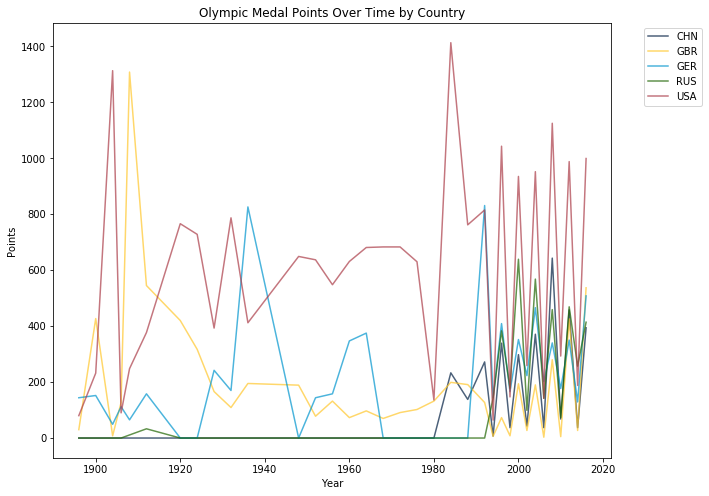

In [234]:
points.plot("Year", width=10, height=8)
plt.title("Olympic Medal Points Over Time by Country")
plt.ylabel("Points");

This graph is awfully confusing. A more intuitive way to visualize this is through the cumulative number of points each country has. Now, how do we get the total points *so far* of each country?  Let's move outside of the table for now, and work with numpy a bit.

In [237]:
# Let's get the total points so far for each year for China.
np.cumsum(points.column("CHN"))

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,  233,  371,
        643,  650,  989, 1026, 1324, 1367, 1738, 1775, 2418, 2486, 2944,
       2981, 3375], dtype=int32)

So, let's replace each column in our table with the cumulative sum data like we just calculated!

In [238]:
chn = np.cumsum(points.column("CHN"))
usa = np.cumsum(points.column("USA"))
rus = np.cumsum(points.column("RUS"))
gbr = np.cumsum(points.column("GBR"))
ger = np.cumsum(points.column("GER"))

In [239]:
cumulative_points = points.with_columns([
    "CHN", chn,
    "USA", usa,
    "RUS", rus,
    "GBR", gbr,
    "GER", ger
])

cumulative_points

Year,CHN,GBR,GER,RUS,USA
1896,0,30,144,0,80
1900,0,457,296,0,312
1904,0,465,345,0,1625
1906,0,592,457,0,1715
1908,0,1900,522,11,1963
1912,0,2445,680,44,2340
1920,0,2865,680,44,3106
1924,0,3182,680,44,3834
1928,0,3348,922,44,4227
1932,0,3457,1092,44,5014


## Can we rewrite this with a for loop (hint: yes)

In [247]:
cumulative_points = Table().with_column("Year", points.column("Year"))
for country in included_countries:
#     print(country)
    cumulative_points = cumulative_points.with_column(country, np.cumsum(points.column(country)))
#     print(cumulative_points)
#     print("-----------------------")
cumulative_points

Year,USA,CHN,RUS,GBR,GER
1896,80,0,0,30,144
1900,312,0,0,457,296
1904,1625,0,0,465,345
1906,1715,0,0,592,457
1908,1963,0,11,1900,522
1912,2340,0,44,2445,680
1920,3106,0,44,2865,680
1924,3834,0,44,3182,680
1928,4227,0,44,3348,922
1932,5014,0,44,3457,1092


This brings us to the final plot of the notebook:

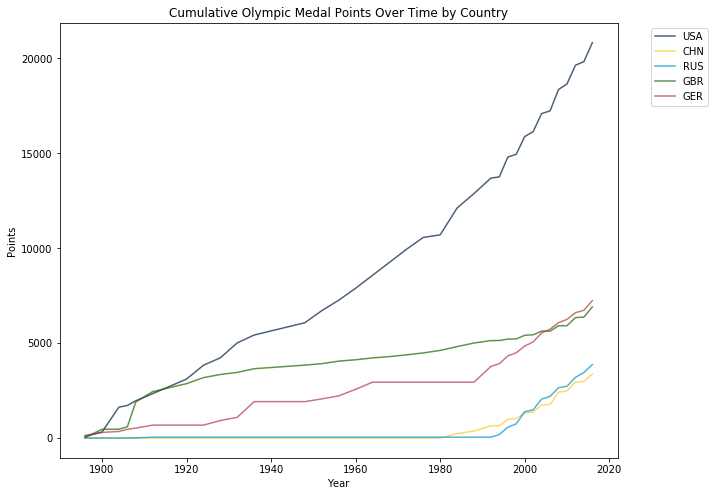

In [246]:
cumulative_points.plot("Year", width=10, height=8)
plt.title("Cumulative Olympic Medal Points Over Time by Country")
plt.ylabel("Points");